![fna_image](https://www.ucsfhealth.org/-/media/project/ucsf/ucsf-health/education/hero/biopsy-for-breast-cancer-diagnosis-surgical-breast-biopsy-2x.jpg?h=376&w=974&hash=E1FD69DF6F73AEF586177DBEF2961FF3)
# DS2500: Breast Cancer Prediction Model
## By Seamus Coyne (coyne.se@northeastern.edu)

### Table of Contents:

1 - [Background](#background)

2 - [Data Introduction](#intro_to_data)

3 - [Methods Used](#methods)

4 - [Results and Future Work](#results)

5 - [Section I: General Frameworking of Data](#general_frameworking)

6 - [Section II: KNN Model Creation and Training](#knn_model)

7 - [Section III: Model Classification Report](#model_classification)

8 - [Section IV: Prototyping User Inputs for UI](#ui_proto)

9 - [Section V: Creation of UI Web Application](#web_app)

10 - [Works Cited](#cites)

# Building Blocks

## Background <a id='background'></a>

Breast cancer remains among the leaders in cancer mortality rates, being especially detrimental to women. In fact, it accounts for roughly 30% of new female cancers yearly<sup>1</sup>. With fatality numbers reaching 42,000 women and 500 men per year<sup>2</sup>, breast cancer is a common and devistating relatity for many families. However, many developed nations have found ways to prevent these tragedies. Countries with an abundance in medical resources are often able to employ preventative screen measures, such as annual mammography. These measures ensure early treatment in many cases, contributing to the 4-5 year relative survival rate superceding 80%<sup>3</sup>, indicating the importance of rapidity in the diagnosis and treatment of the disease.

Following the determination of a mass from any number of screening methods, the most common next step is to undergo a biopsy. A biopsy involves removing a portion of the unknown mass and viewing it microscopically. Data gathered on the cells is able to give information on the potential of the cancer to be benign or malignant, allowing physicians and patients to be informed while moving forward. However, depending on medical screening architectures available, this process can be length or entirely impossible. A similar method of analysis may be completed in the form of a fine needle aspiration (FNA). This procedure is often far more avaible and cost effective in developing and developed nations, and was thus used in this model. In order to facilitate the rapid diagnosis and treatment of breast cancers, a highly accurate and accessible tool able to be used by both healthcare professionals and patients is needed.

![FNA Procedure](https://www.verywellhealth.com/thmb/DBFUeryoNDXqaYKRBZvSSyy9o7E=/4000x2700/filters:no_upscale():max_bytes(150000):strip_icc()/VWH-EllenLindner-WhattoExpectDuringaFineNeedleAspiration-Standard-f3922b5388734f2b879d5a895a97c9fe.jpg)

## Introduction to the Data <a id='intro_to_data'></a>

The data used in this project is drawn from the **[UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)**, an opensource collection of datasets relating to numerous topics. In total, data pertaining to the diagnosis and characteristics of 569 FNA samples is available, of which 357 were ultimately diagnosed as benign and the remaining 212 as maligant. All necessary columns will be used to test and train the model. 

The data is categorized into the following ten (10) features:

- Radius (mean distance from center to perimeter points)
- Texture (standard deviation of grey scale values)
- Perimeter, area, smoothness (local variation in radius lengths)
- Area
- Smoothness
- Compactness (perimeter2/(area – 1.0))
- Concavity (severity of concave portions of the contour)
- Concave Points (number of concave portions of the contour)
- Symmetry
- Fractal Dimension (“coastline approximation” – 1)

*Note that two (2) columns hold identification numbers and the final diagnosis. Additional columns containing the "worst" measurements were removed, as they negatively impacted usability and accuracy of the model.


## Methods Used <a id='methods'></a>
**Cleaning**: As the raw data, and thus initial dataframe, included excess columns that could not be kept for the final model, data cleaning was an important first step. Multiple columns were dropped, while numerous exploratory plots were made to gain a better understanding on the dataset. For more information, see **[Section I: General Frameworking of Data](#general_frameworking)**.

**KNN Model/Cross-Fold Validation**: Following data cleaning and exploration, a KNN model prioritizing accuracy was developed. SciKit Learn test-train-split was used to seperate the dataset into four groups, two for training and two for testing. It is important to note that the data exists within a significant range. For instance, the mean value of fractal dimension is roughly 0.062, while the mean value of perimeter is between 115.37 and 78.08. In order to ensure that these values were all interpreted with the same weight, a feature scaler was necessary. For more information, see **[Section II: KNN Model Creation and Training](#knn_model)**.

**Classification Report**: To determine the accuracy, precision, and other metrics important for further improvement, the SciKit Learn Metrics Classification Report tool was used. For more information, see **[Section III: Classification Report](#model_classification)**.

**Plotly Dash**: In order to develop and deploy the web application, the Plotly Dash package was used. This facilitates compatability between Python and CSS and HTML design features. Using this package, a dashboard was created, allowing for a user interaction to occur while avoiding the backend code. For more information, see **[Section V: Creation of a UI Web Application](#web_app)**.



## Results and Future Work <a id='results'></a>

The results of this project demonstrate the strong connection between cellular attributes and the final diagnosis of the cancer. As the model presents accuracy in the range of 85 - 98%, there is evidently an extremely robust relationship between each feature and the ultimate function of the cell. I believe that the interface aspect of the project greatly increases its usability; there is no need to be educated in data science to gain insights from the tool. Furthermore, the additional outputs improve the information made available from the model, and allow users (healthcare workers or patients) to be confident in the prediction and their next steps.

While the capabilities of the current model and interface are vast and powerful, there are futher integrations that may extend the possible usage cases of the interface. One that I have considered is extending the web application to require patient input data, such as name, date of birth, primary care physician, vitals, etc.. This information could they be stored in a MySQL or SQLite database, along with the diagnostic prediction. This integration would allow for an electronic medical record (EMR) -style database to facilitate record retrival at a later data. Once final diagnoses are made, they may be added to the training and testing datasets, improving the model in an evolutionary manner.


# Section I: General Frameworking of Data <a id='general_frameworking'></a>
---
This portion of the code includes foundational steps, including reading the dataset into a dataframe, basic manipulation, and exploration of the data. This was done to lay the groundwork for the remainder of the project. 

Unwanted columns were dropped, including the id number, Unnamed: 32, and all columns with "worst" data, as these negatively impeded data processing and user inputs.

Several basic plots were made, including bar plots breaking down benign and malignant case counts, as well as numerous scatter plots to better-understand potential relationships between variables<sup>Note</sup>. Additionally, B (marking "benign") and M (marking "malignant") were remapped to 1 and 0 respectively to allow for model manipulation. A seaborn heatmap was the final plot generated, with the goal of better-understanding potential links among data.

Note: Many additional exploratory scatter plots were made, however they were removed prior to submission as they did not significantly impact any data interpretations.

In [1]:
# Importing all necessary functions
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Ignoring warnings (they don't prevent the programming from running properly)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Establishing dataframe of .csv data
df = pd.read_csv('breast_cancer_dataset.csv')

In [3]:
# Verifying data importation
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.shape

(569, 33)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
# Checking for missing values in df
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [7]:
# Dropping column containing missing values and id column
drop_cols = ['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se',
'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se',
'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst',
'compactness_worst', 'concavity_worst', 'concave points_worst', "symmetry_worst",
'fractal_dimension_worst', 'Unnamed: 32','id']

df = df.drop(drop_cols, axis = 1)

Text(0, 0.5, 'Count')

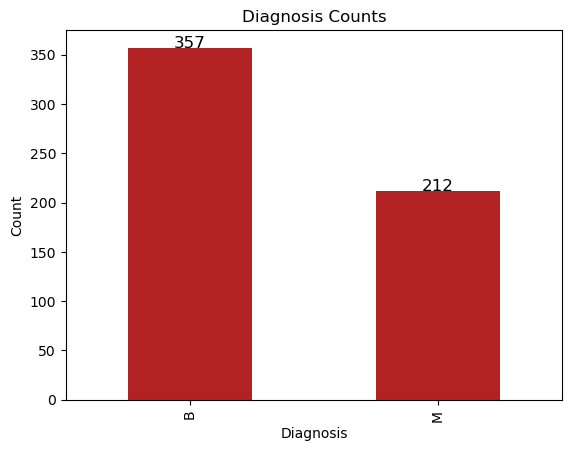

In [8]:
# Target variable breakdown
val_counts = df['diagnosis'].value_counts()
ax = val_counts.plot(kind = 'bar', color = 'firebrick')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., 
                                      p.get_height()), ha='center', fontsize=12, color='black')

plt.title('Diagnosis Counts')
plt.xlabel('Diagnosis')
plt.ylabel('Count')

In [9]:
# Remapping all diagnosis column to have 'benign' as 1 and 'malignant' as 0
df['diagnosis'] = df['diagnosis'].map({'M' : 0, 'B' : 1})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
0,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


Text(0, 0.5, 'Count')

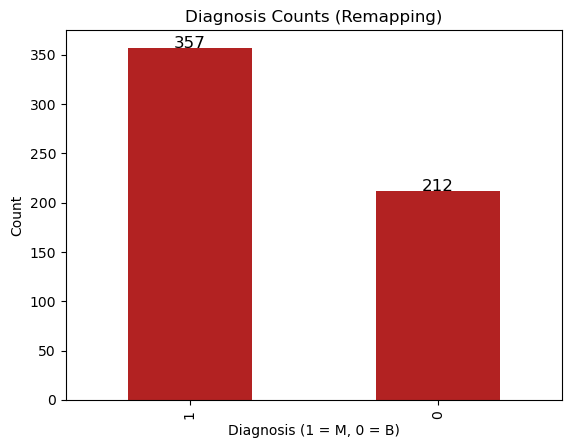

In [10]:
# Replotting 'diagnosis' variable breakdown with new mapping
val_counts = df['diagnosis'].value_counts()
ax = val_counts.plot(kind = 'bar', color = 'firebrick')
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., 
                                      p.get_height()), ha='center', fontsize=12, color='black')
    
plt.title('Diagnosis Counts (Remapping)')
plt.xlabel('Diagnosis (1 = M, 0 = B)')
plt.ylabel('Count')

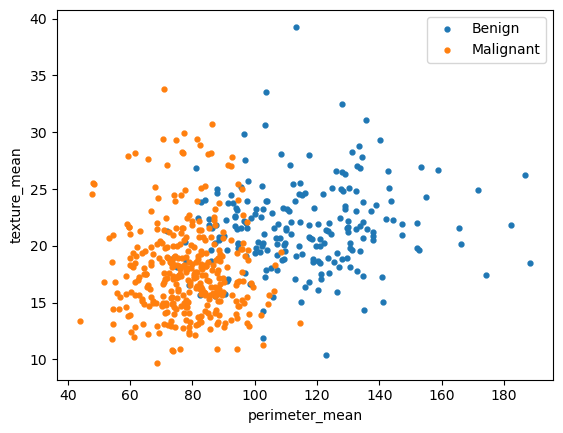

In [11]:
# Plotting the features with each other.
groups = df.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.perimeter_mean, group.texture_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.xlabel("perimeter_mean")
plt.ylabel("texture_mean")
plt.show() 

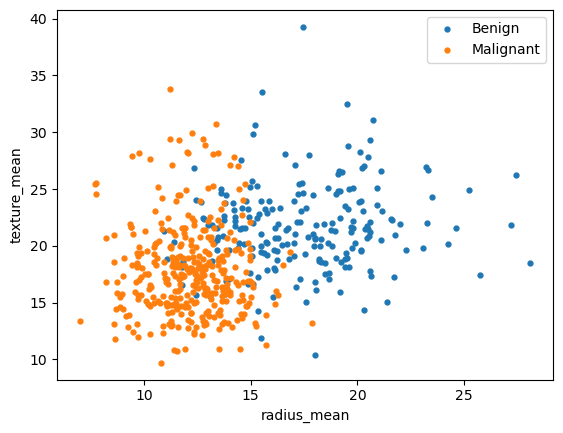

In [12]:
groups = df.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.radius_mean, group.texture_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.ylabel("texture_mean")
plt.xlabel("radius_mean")
plt.show()

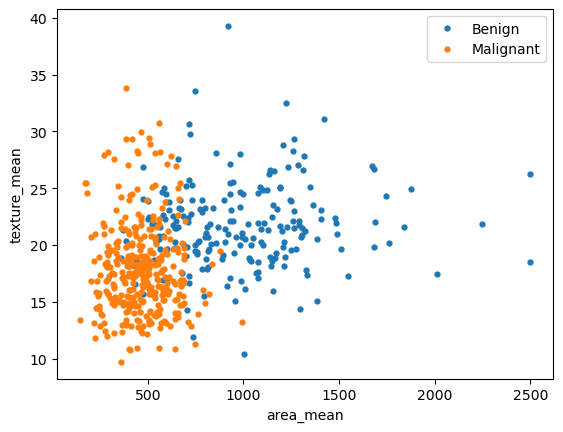

In [13]:
groups = df.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.area_mean, group.texture_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.ylabel("texture_mean")
plt.xlabel("area_mean")
plt.show()  

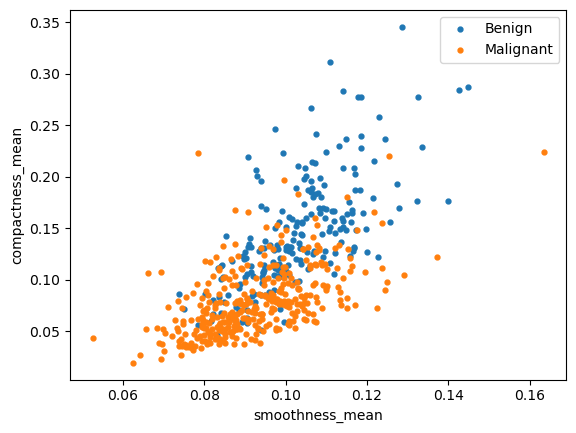

In [14]:
groups = df.groupby('diagnosis')
fig, ax = plt.subplots()
for name, group in groups:
    ax.plot(group.smoothness_mean, group.compactness_mean, marker='o', ms=3.5, linestyle='', 
            label = 'Malignant' if name == 1 else 'Benign')
ax.legend()
plt.ylabel("compactness_mean")
plt.xlabel("smoothness_mean")
plt.show()   

In [15]:
# Viewing mean metrics on both diagnosis variables
df_mean = df.groupby('diagnosis').mean()
df_mean

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867


Text(0.5, 1.0, 'Correlation Matrix Between Features')

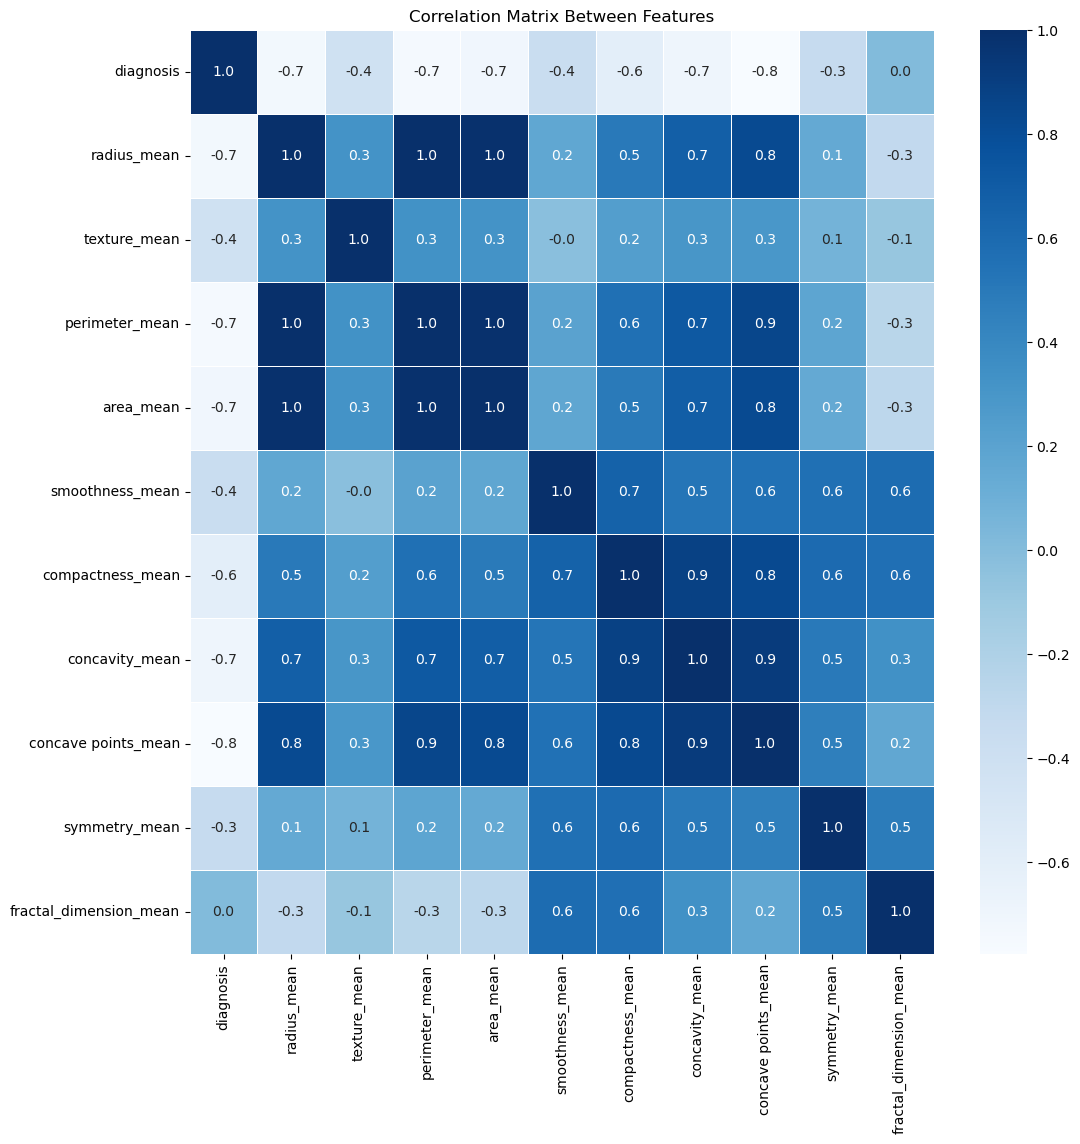

In [16]:
import seaborn as sns
f,ax = plt.subplots(figsize = (12, 12))
sns.heatmap(df.corr(), annot = True, linewidths=.5, fmt = '.1f',ax = ax, cmap = "Blues")
plt.title("Correlation Matrix Between Features")

# Section II: KNN Model Creation and Training <a id='knn_model'></a>
---
This portion of the code is responsible for the formation and training of the KNN model. To complete this, the dataset was broken into labels and features (where the true label is dropped). X and y training and testing groups were made using the sklearn train_test_split function, with the test size being set to 0.20. From here, the sklearn Standard Scaler was used to ensure that all features were on a normalized scale.

Ten-fold cross-validation was used, with cv_scores and neighbors being recorded. Using the cv_scores data, the Misclassification Error was calculated via a list comprehension. Based on the lowest MSE score, the optimal K value was determined for the given iteration. This was returned to the user and verified visually through the usage of a line plot. From here, the sklearn KNeighborsClassifier was used to develop the knn model, utilizing the calculated optimal K. To better facilitate predictions, a NumPy array was used, rather than the previous dataframe.

In [17]:
df_labels = pd.DataFrame(df['diagnosis'])
df_features = df.drop(['diagnosis'], axis = 1)

In [18]:
# Establishing test and train groups
X_train, X_test, y_train, y_test = train_test_split(df_features, df_labels, test_size = 0.20)

In [19]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(455, 10) (114, 10) (455, 1) (114, 1)


In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

# Create a scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)


# Perform 10-fold cross-validation
neighbors = []
cv_scores = []

for k in range(1, 10):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# Print the cross-validation scores
print(cv_scores)


[0.9143478260869566, 0.9143478260869566, 0.9363768115942029, 0.9320772946859904, 0.9430434782608696, 0.9342512077294686, 0.9385507246376811, 0.9364251207729468, 0.9450724637681158]


The optimal number of neighbors is 9


Text(0, 0.5, 'Misclassification Error')

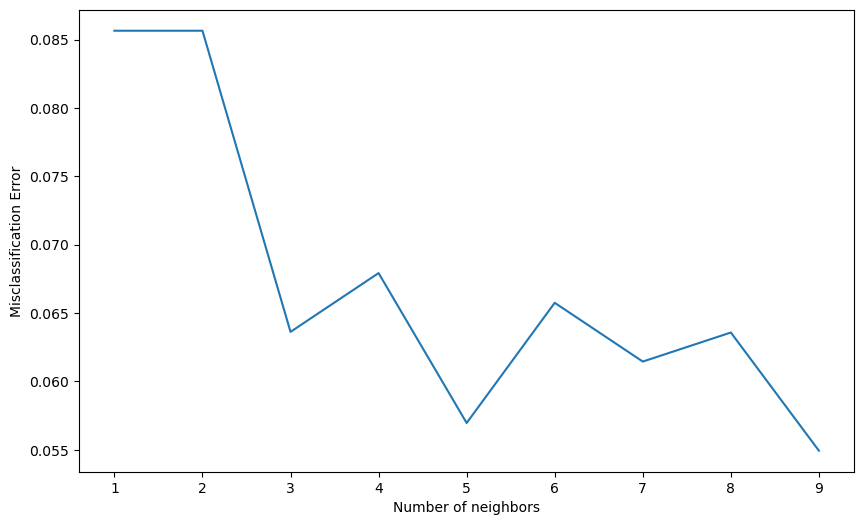

In [21]:
#Misclassification error versus k
MSE = [1-i for i in cv_scores]

#determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print(f'The optimal number of neighbors is {optimal_k}')

#plot misclassification error versus k
plt.figure(figsize = (10,6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')

In [22]:
knn = KNeighborsClassifier(n_neighbors = optimal_k)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [23]:
from sklearn.preprocessing import StandardScaler

# scaler
scaler = StandardScaler()

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train)

# Directly transform the test data using the same scaler
X_test_scaled = scaler.transform(X_test.values)

# Convert X_test to a NumPy array
X_test_np = X_test_scaled

# Create and train the KNN model
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data
y_pred = knn.predict(X_test_np)

# Section III: Model Classification Report <a id='model_classification'></a>
---
Using the sklearn metrics package, a classification report was generated for the given iteration. The report shows the accuracy, recall, and f1-score for the given iteration and may be used to determine confidence in the model. Accuracy was the value of primary concern, and was reported to the user through the interface later on.

Additionally, a confusion matrix and heatmap was generated. These offered a visual illustration of the accuracy of the model, showing both the correct and incorrect predictions of the model. A version of this plot was also returned in the user interface.

In [24]:
from sklearn.metrics import classification_report

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))

# Accuracy score
accuracy = accuracy_score(y_pred, y_test)
print('accuracy is', accuracy)

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.97      0.96      0.97        76

    accuracy                           0.96       114
   macro avg       0.95      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

accuracy is 0.956140350877193


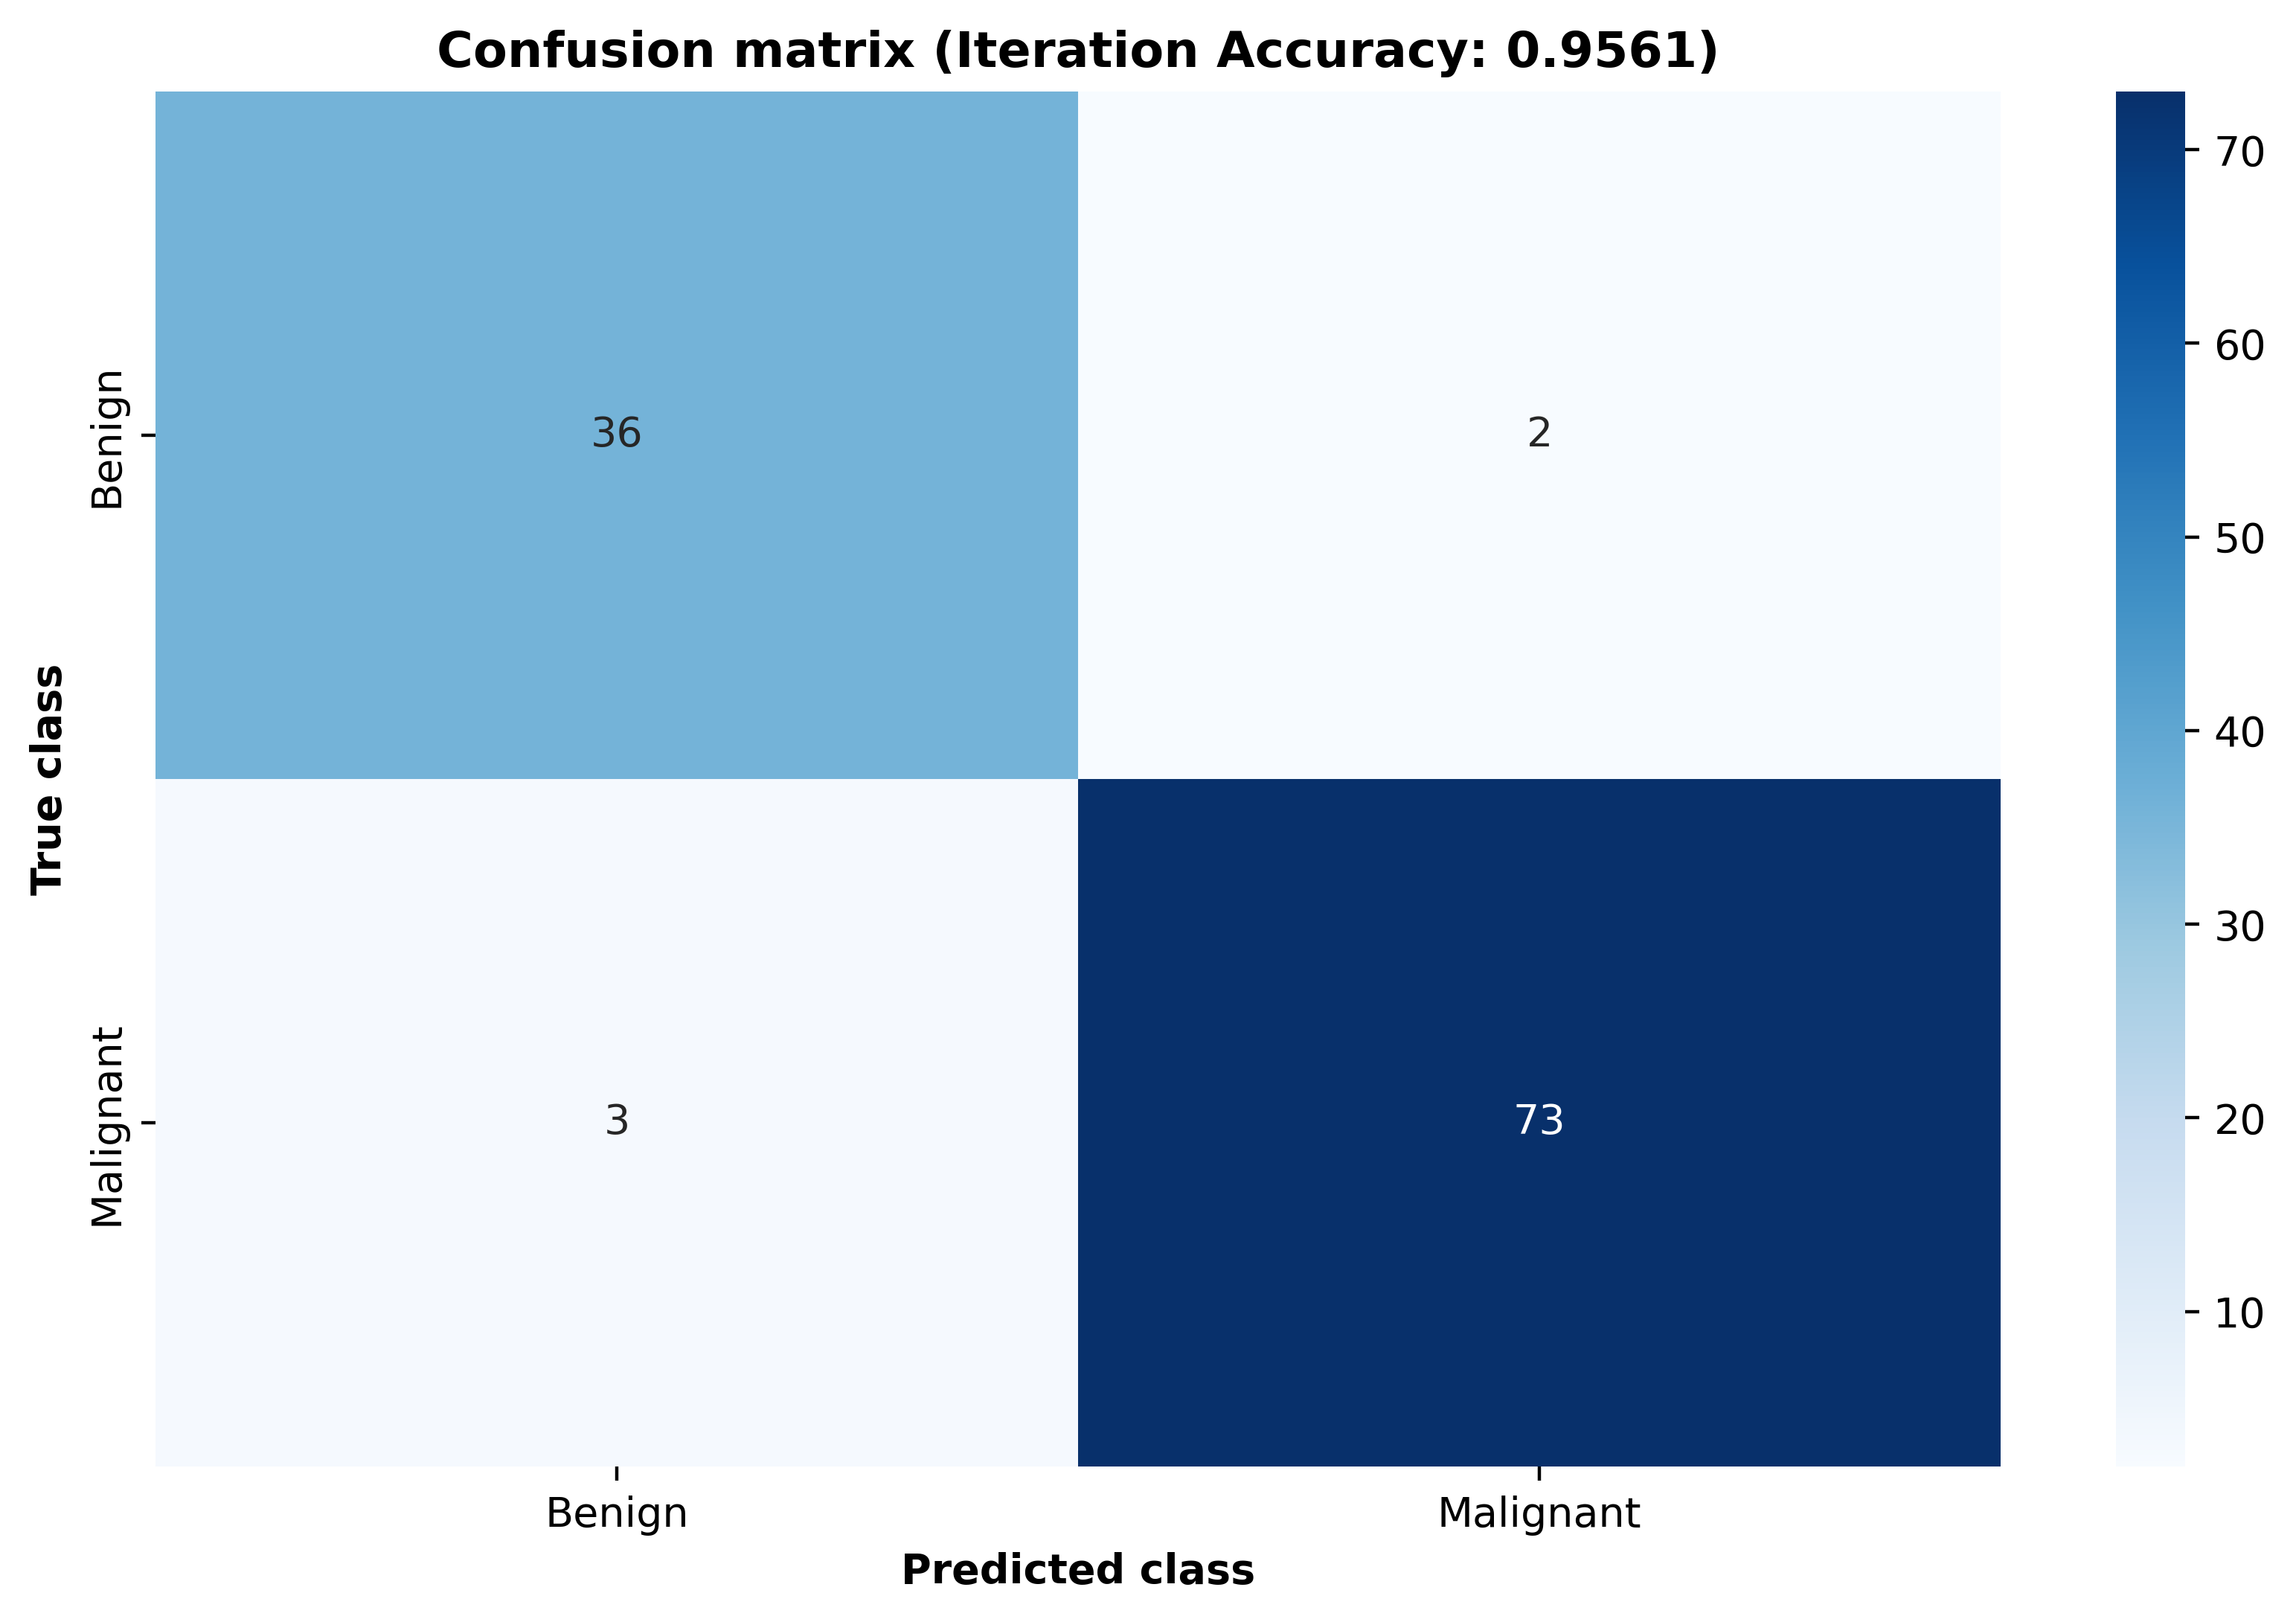

In [25]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Extract individual values from the confusion matrix
tn, fp, fn, tp = conf_matrix.ravel()

# Define class labels
labels = ['Benign', 'Malignant']

# Plot the confusion matrix
plt.figure(figsize=(10, 6), dpi = 400)
sns.heatmap(conf_matrix, xticklabels=labels, yticklabels=labels, annot=True, fmt="d", cmap = 'Blues')
plt.title(f"Confusion matrix (Iteration Accuracy: {round(accuracy, 4)})", weight = 'bold')
plt.ylabel('True class', weight = 'bold')
plt.xlabel('Predicted class', weight = 'bold')
plt.show()

# Section IV: Prototyping User Inputs for UI <a id='ui_proto'></a>
---
In order to simplify the dashboard-building process and preemptively eliminate possible errors, I opted to build a prototype of the user-input prediction model here. This code collects user inputs and converts them into a NumPy array, before using a scaler to normalize the inputs. The previously built KNN model then generates a prediction in a binary form (0 representing malignant and 1 representing benign). This was also used the manually verify the model through the usage of test cases (known FNA results not found in the dataset).

**NOTE FOR USERS: To avoid having to enter inputs for all features, enter "n" when prompted; the prototype code will be terminated and the cell coding for the web app will run.**

In [26]:
import numpy as np

# Hardcoding a list for user input remappings
all_feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 
                     'smoothness_mean', 'compactness_mean', 'concavity_mean', 
                     'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']

def get_user_input():
    ''' Creating a function to iterate through the all_feature_names list and collecting a user-input value'''
    user_input = []
    for feature in all_feature_names:
        value = float(input(f"Enter value for {feature}: "))
        user_input.append(value)
    return user_input


# Allowing for programming termination from user
while True:
    run_status = input("Would you like to run the program? [y/n]").lower()

    if run_status == "y":
        print()

        # Get user input
        user_input_data = get_user_input()

        # Change the input_data to a numpy array
        user_input_array = np.asarray(user_input_data)

        # Reshape the numpy array as we are predicting for one data point
        user_input_data_reshaped = user_input_array.reshape(1, -1)

        # Standardizing the input data
        user_input_data_std = scaler.transform(user_input_data_reshaped)

        # Make predictions using the KNN model
        prediction = knn.predict(user_input_data_std)
        
        # 0 is mapped to malignancy
        if prediction[0] == 0:
            print()
            print('Tumor is predicted to be:')
            print('\033[1mMalignant\033[0m')
        
        # 1 is mapped to a benign tumor
        else:
            print()
            print('Tumor is predicted to be:')
            print('\033[1mBenign\033[0m')
            
        # Reporting accuracy of the model to the user
        print()
        print('Current Iteration Accuracy:')
        print(f"{round((accuracy * 100), 4)}%")
        break
        
    elif run_status == "n":
        print("Program terminated by user")
        break
        
    else:
        print("Unknown input. Please try again")
    
# Test Cases:
# B	13.54	14.36	87.46	566.3	0.09779	0.08129	0.06664	0.04781	0.1885	0.05766
# M	20.57	17.77	132.9	1326	0.08474	0.07864	0.0869	0.07017	0.1812	0.05667

Would you like to run the program? [y/n]n
Program terminated by user


# Section V: Creation of UI Web Application <a id='web_app'></a>
---
Keeping mind to the initial goal of creating a method for the model to be interacted with while avoiding the data science-y code aspects, a Plotly dashboard was developed. The code below uses components of the KNN model and confusion matrix heatmap to create an interactive web app.

To optimize the information gain from the interface, a sample of 5 results from the model are returned in the form of a table, along with the final prediction, the iteration accuracy, and the heatmap visualization. To use the model, enter inputs for the 10 features and review the outputs.

**NOTE TO USERS: A bug in Plotly occasionally requires the dashboard to be refreshed. If you recieve an page with the heading "DuplicateIDError" rather than a pretty pink app upon clicking the http link, refresh and the page should open.**

In [ ]:
import dash
from dash import html, dcc, dash_table
import numpy as np
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go

# Create Dash app
app = dash.Dash(__name__)

# Layout
app.layout = html.Div(style={'backgroundImage': 'linear-gradient(to bottom, #f59dd4, #f2dcea)', 'padding': '20px'},
                      children=[
                          html.H1(
                              children='Breast Cancer FNA Analysis',
                              style={
                                  'textAlign': 'center',
                                  'color': 'black'
                              }
                          ),
                          html.H2(
                              children=[
                                  "Directions for Best Use: Input the following 10 criteria based on FNA results.",
                                  " Review table results for data pertaining to pre-diagnosed tumors of similar condition.",
                                  " Hover over Confusion Matrix boxes to review accuracy.",
                                  html.Span(f" Iteration accuracy: {round((accuracy * 100), 2)}%", style={'color': '#008080'})
                              ],
                              style={
                                  'textAlign': 'center',
                                  'color': '#000000'
                              }
                          ),

                          # Create a new row for user inputs and confusion matrix
                          html.Div([
                              # User inputs in the form of html Divs (very repetitive)
                              html.Div([
                                  html.Div([
                                      html.Label('Radius:  ', style={'color': 'black'}),
                                      dcc.Input(id='radius', type='number',
                                                style={'marginBottom': '25px'}),
                                  ]),
                                  html.Div([
                                      html.Label('Texture:  ', style={'color': 'black'}),
                                      dcc.Input(id='texture', type='number',
                                                style={'marginBottom': '25px'}),
                                  ]),
                                  html.Div([
                                      html.Label('Perimeter:  ', style={'color': 'black'}),
                                      dcc.Input(id='perimeter', type='number',
                                                style={'marginBottom': '25px'}),
                                  ]),
                                  html.Div([
                                      html.Label('Area:  ', style={'color': 'black'}),
                                      dcc.Input(id='area', type='number',
                                                style={'marginBottom': '25px'}),
                                  ]),
                                  html.Div([
                                      html.Label('Smoothness:  ', style={'color': 'black'}),
                                      dcc.Input(id='smoothness', type='number',
                                                style={'marginBottom': '25px'}),
                                  ]),
                                  html.Div([
                                      html.Label('Compactness:  ', style={'color': 'black'}),
                                      dcc.Input(id='compactness', type='number',
                                                style={'marginBottom': '25px'}),
                                  ]),
                                  html.Div([
                                      html.Label('Concavity:  ', style={'color': 'black'}),
                                      dcc.Input(id='concavity', type='number',
                                                style={'marginBottom': '25px'}),
                                  ]),
                                  html.Div([
                                      html.Label('Concave Points:  ', style={'color': 'black'}),
                                      dcc.Input(id='concave_points', type='number',
                                                style={'marginBottom': '25px'}),
                                  ]),
                                  html.Div([
                                      html.Label('Symmetry:  ', style={'color': 'black'}),
                                      dcc.Input(id='symmetry', type='number',
                                                style={'marginBottom': '25px'}),
                                  ]),
                                  html.Div([
                                      html.Label('Fractal Dimension:  ', style={'color': 'black'}),
                                      dcc.Input(id='fractal_dimension', type='number',
                                                style={'marginBottom': '25px'}),
                                  ]),
                              ], style={'width': '48%', 'display': 'inline-block', 'marginRight': '2%'}),

                              # Confusion matrix
                                html.Div([
                                    dcc.Graph(id='confusion-matrix',
                                              figure={'data': [{'type': 'heatmap',
                                                                'z': conf_matrix,
                                                                'x': labels,
                                                                'y': labels,
                                                                'colorscale': 'Blues',
                                                                'showscale': False,
                                                                'text': conf_matrix,
                                                                'hoverinfo': 'text'}],
                                                      'layout': {'title': "Confusion matrix",
                                                                 'xaxis': {'title': 'Predicted class'},
                                                                 'yaxis': {'title': 'True class'}}})
                                ],
                                style={'width': '48%', 'display': 'inline-block'}),

                          ]),

                          # Button to trigger prediction (redundant in the final UI)
                          html.Button('Predict', id='predict-button',
                                      n_clicks=0,
                                      style={'marginTop': '20px'}),

                          # Output for prediction result and table
                          html.Div([
                              html.Div(id='prediction-result',
                                       style={'marginTop': '20px',
                                              'color': 'white'}),

                              html.Div(id='prediction-result',
                                       style={'marginTop': '20px'}),
                              # Add a new div for the table
                              html.Div([
                                  dash_table.DataTable(
                                      id='nearest-entries-table',
                                      columns=[
                                          {'name': col, 'id': col} for col in
                                          df.columns
                                      ],
                                      style_table={'overflowX': 'auto'})
                              ])

                          ]),
                      ])

# Callback to handle prediction and fetch k-nearest entries
@app.callback(
    [dash.dependencies.Output('prediction-result', 'children'),
     dash.dependencies.Output('prediction-result', 'style'),
     dash.dependencies.Output('nearest-entries-table', 'data'),
     dash.dependencies.Output('confusion-matrix', 'figure')],
    [dash.dependencies.State('predict-button', 'n_clicks')],
    [dash.dependencies.Input('radius', 'value'),
     dash.dependencies.Input('texture', 'value'),
     dash.dependencies.Input('perimeter', 'value'),
     dash.dependencies.Input('area', 'value'),
     dash.dependencies.Input('smoothness', 'value'),
     dash.dependencies.Input('compactness', 'value'),
     dash.dependencies.Input('concavity', 'value'),
     dash.dependencies.Input('concave_points', 'value'),
     dash.dependencies.Input('symmetry', 'value'),
     dash.dependencies.Input('fractal_dimension', 'value')]
)
def predict(n_clicks, radius, texture, perimeter, area, smoothness, compactness,
            concavity, concave_points, symmetry, fractal_dimension):
    try:
        # Create a mapping between user-input features and the corresponding features used during training
        feature_mapping = {
            'radius': 'radius_mean',
            'texture': 'texture_mean',
            'perimeter': 'perimeter_mean',
            'area': 'area_mean',
            'smoothness': 'smoothness_mean',
            'compactness': 'compactness_mean',
            'concavity': 'concavity_mean',
            'concave_points': 'concave points_mean',
            'symmetry': 'symmetry_mean',
            'fractal_dimension': 'fractal_dimension_mean'
        }

        # Map user input to all features used during training
        all_input = [radius, texture, perimeter, area, smoothness, compactness,
                     concavity, concave_points, symmetry, fractal_dimension]
        for i, feature in enumerate(all_input):
            feature_name = feature_mapping.get(f'feature{i + 1}', f'feature{i + 1}')
            # Perform any necessary data transformations if needed

        # Scale the input data
        input_data = np.array(all_input).reshape(1, -1)
        input_data_scaled = scaler.transform(input_data)  # Use the same scaler as during training

        # Fetch k-nearest entries
        neighbors = NearestNeighbors(n_neighbors=5)
        neighbors.fit(X_train_scaled)
        distances, indices = neighbors.kneighbors(input_data_scaled)

        # Extract k-nearest entries from the DataFrame
        nearest_entries = df.iloc[indices[0]]

        # Make prediction
        prediction = knn.predict(input_data_scaled)

        if prediction[0] == 0:
            result = 'Tumor is predicted to be: MALIGNANT'
            style = {'marginTop': '40px', 'color': 'firebrick', 'fontSize': 35}
        else:
            result = 'Tumor is predicted to be: BENIGN'
            style = {'marginTop': '40px', 'color': 'green', "fontSize": 35}
        # Calculate confusion matrix
        conf_matrix = confusion_matrix(y_test, y_pred)

        # Create a Plotly figure for the confusion matrix
        figure = go.Figure(data=go.Heatmap(z = conf_matrix, x = labels, y = labels, colorscale = 'Magenta', showscale = True))
        figure.update_layout(
            title = dict(text = "Confusion Matrix", x=0.5, y=0.9),
            xaxis = dict(title = 'Predicted Class'),
            yaxis = dict(title = 'True Class'),
        )

        
        return result, style, nearest_entries.to_dict('records'), figure
    except Exception as e:
        return "An error occurred during prediction. Please check your inputs and try again.", {'color': '#008080'}, [], {'data': []}


# Run the app
app.run_server(debug=True, use_reloader=False)


Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: on


# Works Cited <a id='cites'></a>
---
1. https://www.cancer.org/cancer/types/breast-cancer/about/how-common-is-breast-cancer.html#:~:text=Breast%20cancer%20is%20the%20most,new%20female%20cancers%20each%20year.

2. https://seer.cancer.gov/statfacts/html/breast.html

3. Sun, Y. S., Zhao, Z., Yang, Z. N., Xu, F., Lu, H. J., Zhu, Z. Y., Shi, W., Jiang, J., Yao, P. P., & Zhu, H. P. (2017). Risk Factors and Preventions of Breast Cancer. International journal of biological sciences, 13(11), 1387–1397. https://doi.org/10.7150/ijbs.21635

